> We will see one kuka robot dancing with a ur5 robot

In [1]:
%cd -q ..

In [2]:
from robot.kuka_robot import KukaRobot
from robot.ur5_robot import UR5Robot
from robot.grouping import RobotGroup
from robot.abstract_robot import DynamicRobotFactory
from objects.trajectory import WaypointLinearTrajectory

In [3]:
from time import sleep
def create_traj(robot, distance): 
    gifs = []
    p.resetSimulation()
    p.setAdditionalSearchPath(pybullet_data.getDataPath()) 
    p.configureDebugVisualizer(p.COV_ENABLE_GUI, 0, lightPosition = [0, 0, 0.1])
    p.resetDebugVisualizerCamera(
        cameraDistance=distance,
        cameraYaw=0,
        cameraPitch=0,
        cameraTargetPosition=[0, 0, 0.5])    
    robot.load()
    for timestep in np.linspace(0, len(robot.trajectory.waypoints)-1, 100):
        robot.set_config_at_time(timestep)
        p.performCollisionDetection()
#         print(robot.no_collision(), robot.robots[0].no_collision(), robot.robots[1].no_collision())
        gifs.append(p.getCameraImage(width=480, height=360, lightDirection=[1, 1, 1], shadow=1,
                                     renderer=p.ER_BULLET_HARDWARE_OPENGL)[2])         
        sleep(0.1)
    return gifs


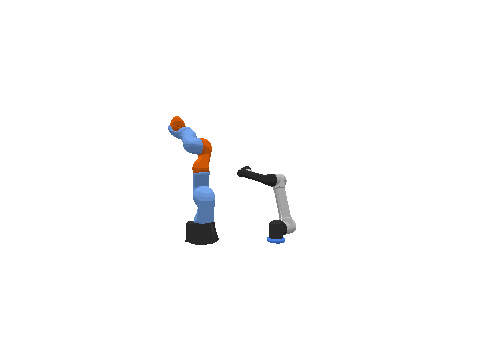

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import pybullet as p
import pybullet_data
import numpy as np
from utils.utils import save_gif
from IPython.display import HTML
import base64

plt.clf()
plt.close('all')
DynamicRobotGrup = DynamicRobotFactory.create_dynamic_robot_class(RobotGroup)

kuka = KukaRobot(base_position=[-0.3, 0, 0])
ur5 = UR5Robot(base_position=[0.3, 0, 0])
group_robot = RobotGroup(robots=[kuka, ur5], collision_eps=0.01)

p.connect(p.DIRECT)
p.resetSimulation()
group_robot.load()
# generate collision-free trajectory
while True:
    traj = WaypointLinearTrajectory(np.random.uniform(low=group_robot.limits_low, high=group_robot.limits_high, size=(4, group_robot.config_dim)))    
    if group_robot._edge_fp(traj.waypoints[0], traj.waypoints[1]) and group_robot._edge_fp(traj.waypoints[1], traj.waypoints[2]):
        break
p.disconnect()

p.connect(p.GUI, options='--background_color_red=1.0 --background_color_green=1.0 --background_color_blue=1.0')
dynamic_robot = DynamicRobotGrup(robots=[kuka, ur5], 
                                 trajectory=traj)
gifs = create_traj(dynamic_robot, 1.5)
p.disconnect()    


save_gif(gifs, f'data/visualization/grouping_robot.gif')
b64 = base64.b64encode(open(f'data/visualization/grouping_robot.gif', 'rb').read()).decode('ascii')
display(HTML(f'<img src="data:image/gif;base64,{b64}" />'))